# Get Markers

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import clickpoints

# load the example data
clickpoints.loadExample("king_penguins")

## Get Markers By Image

In [2]:
# open the database
with clickpoints.DataFile("count.cdb") as db:
    # iterate over images
    for index, image in enumerate(db.getImages()):
        # get the "adult" markers of the current image
        markers = db.getMarkers(image=image, type="adult")
        # print the results
        print("image:", image.filename, "\t", "adult penguins:", markers.count())

image: 20150312-110000_microbs_GoPro.jpg 	 adult penguins: 345
image: 20150408-150001_microbs_GoPro.jpg 	 adult penguins: 159
image: 20150514-110000_microbs_GoPro.jpg 	 adult penguins: 52


In [3]:
# open the database
with clickpoints.DataFile("count.cdb") as db:
    # iterate over images
    for index, image in enumerate(db.getImages()):
        # get the "adult" markers of the current image
        markers = db.getMarkers(image=image, type="juvenile")
        # convert the result to an array
        markers_array = np.array(markers)
        # print the results
        print("image:", image.filename, "\t", "juvenile penguin positions:", markers_array.shape)

image: 20150312-110000_microbs_GoPro.jpg 	 juvenile penguin positions: (219, 2)
image: 20150408-150001_microbs_GoPro.jpg 	 juvenile penguin positions: (223, 2)
image: 20150514-110000_microbs_GoPro.jpg 	 juvenile penguin positions: (215, 2)


## Get All Markers

We can iterate over all markers and get the image filename and its position.

In [4]:
# open the database
with clickpoints.DataFile("count.cdb") as db:
    
    # get all markers without any filtering
    markers = db.getMarkers()
    
    # iterate over all markers (limit here to the first 10 to keep the print short)
    for marker in markers[:10]:
        # get the image assigned to the marker (and print its filename)
        # get the type assigned to the marker (and print its name)
        # and print x and y position of the marker
        print(marker.image.filename, marker.type.name, marker.x, marker.y)

20150312-110000_microbs_GoPro.jpg adult 327.59827813855543 649.337656021798
20150312-110000_microbs_GoPro.jpg adult 333.6240512981161 623.7281200936649
20150312-110000_microbs_GoPro.jpg adult 316.7518864513461 592.3940996639491
20150312-110000_microbs_GoPro.jpg adult 331.8163193502479 562.2652338661454
20150312-110000_microbs_GoPro.jpg adult 353.8103913826446 594.5031202697953
20150312-110000_microbs_GoPro.jpg adult 375.5031747570632 565.2781204459258
20150312-110000_microbs_GoPro.jpg adult 378.8173499948216 631.8629138590718
20150312-110000_microbs_GoPro.jpg adult 399.90755605328417 605.9520892729607
20150312-110000_microbs_GoPro.jpg adult 369.17611293952444 692.7232227706352
20150312-110000_microbs_GoPro.jpg adult 329.40601008642363 685.1910063211843


## Plot Marker Count

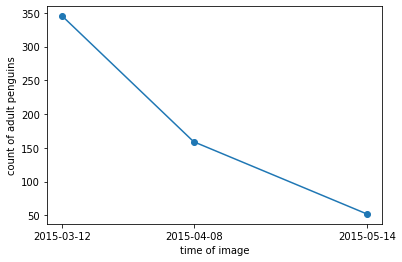

In [5]:
# initialize empty lists
marker_count = []
image_timestamp = []

# open the database
with clickpoints.DataFile("count.cdb") as db:
    
    # iterate over images
    for index, image in enumerate(db.getImages()):

        # get the "adult" markers of the current image
        markers = db.getMarkers(image=image, type="adult")

        # store the timestamp and marker count each in a list
        image_timestamp.append(image.timestamp)
        marker_count.append(markers.count())
    
# plot the lists
plt.plot(image_timestamp, marker_count, "o-")

# label the plot
plt.xticks(image_timestamp)
plt.xlabel("time of image")
plt.ylabel("count of adult penguins")
plt.show()

## Plot Marker Positions

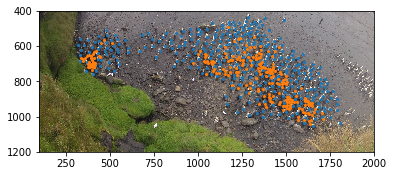

In [6]:
# open the database
with clickpoints.DataFile("count.cdb") as db:
    # get the first image
    im_entry = db.getImage(0)

    # we load the pixel data from the Image database entry
    im_pixel = im_entry.data

    # plot the image
    plt.imshow(im_pixel)

    # get the adults positions in the image and convert it to an array
    adult_positions = np.array(db.getMarkers(image=im_entry, type="adult"))
    # plot the coordinates of the markers
    plt.plot(adult_positions[:, 0], adult_positions[:, 1], 'C0o', ms=2)


    # get the juveniles positions in the image and convert it to an array
    juvenile_positions = np.array(db.getMarkers(image=im_entry, type="juvenile"))
    # plot the coordinates of the markers
    plt.plot(juvenile_positions[:, 0], juvenile_positions[:, 1], 'C1o', ms=2)

    # zoom into the image
    plt.xlim(100, 2000)
    plt.ylim(1200, 400)
    plt.show()

## Add Markers

In [7]:
from pathlib import Path

# open the database
with clickpoints.DataFile("result.cdb", "w") as db:
    
    # add a marker type we want to use for adding markers
    # it has the name "nosie" and the color "#FF0000", e.g. red
    # make it a type for normal markers (default)
    marker_type = db.setMarkerType(name="noise", color="#FF0000", mode=db.TYPE_Normal)
    
    # find all images in the folder and iterate over them
    for image_filename in Path(".").glob("*_microbs_GoPro.jpg"):
        
        # add the image to the database
        im = db.setImage(image_filename)
        
        # draw some random position where we want to add markers
        x, y = np.random.rand(2, 10)
        
        # add the marker positions to the image with the given marker type
        # instead of giving the marker type, we could also just provide its name "noise"
        db.setMarkers(image=im, x=x, y=y, type=marker_type)
